## HW: Regression ##

### due 2019-10-29 ###

HW submission by group (up to 4 people)
* Taoyu Cai <taoyuc3@illinois.edu>

### imports ###

In [1]:
import numpy
import pandas
import time
import random
import matplotlib
#%matplotlib notebook
import matplotlib.pyplot as plt
import scipy.stats
import matplotlib.offsetbox as offsetbox
from matplotlib.ticker import StrMethodFormatter
from scipy.optimize import minimize


In [2]:
params={
    "font.size":15,
    "lines.linewidth":5,
}
plt.rcParams.update(params)

**Problem:**  Download historical ticker prices for AAPL and MSFT from <https://finance.yahoo.com/>
Compute and then plot the returns
Regress AAPL on MSFT and then regress MSFT on AAPL.  Which is a "better" regression (i.e., does MSFT drive AAPL or vice versa?)

In [3]:
MS="MSFT"
AP="AAPL"

In [4]:
def getdata(ticker):
    data=pandas.read_csv(ticker +".csv",index_col=0)
    data.index = pandas.to_datetime(data.index)
    S=pandas.Series(data["Adj Close"],name=ticker)
    return S.copy()

ms=getdata(MS)
ap=getdata(AP)

print(ms.tail(n=10))
print("\n",ap.tail(n=10))

Date
2019-10-14    139.550003
2019-10-15    141.570007
2019-10-16    140.410004
2019-10-17    139.690002
2019-10-18    137.410004
2019-10-21    138.429993
2019-10-22    136.369995
2019-10-23    137.240005
2019-10-24    139.940002
2019-10-25    140.729996
Name: MSFT, dtype: float64

 Date
2019-10-14    235.869995
2019-10-15    235.320007
2019-10-16    234.369995
2019-10-17    235.279999
2019-10-18    236.410004
2019-10-21    240.509995
2019-10-22    239.960007
2019-10-23    243.179993
2019-10-24    243.580002
2019-10-25    246.580002
Name: AAPL, dtype: float64


In [5]:
data_raw=pandas.concat([ms,ap],axis="columns",join="inner")
data_raw.tail(n=10)

,MSFT,AAPL
Date,,
2019-10-14,139.550003,235.869995
2019-10-15,141.570007,235.320007
2019-10-16,140.410004,234.369995
2019-10-17,139.690002,235.279999
2019-10-18,137.410004,236.410004
2019-10-21,138.429993,240.509995
2019-10-22,136.369995,239.960007
2019-10-23,137.240005,243.179993
2019-10-24,139.940002,243.580002


In [6]:
prices=data_raw.copy()
prices.tail(n=10)

,MSFT,AAPL
Date,,
2019-10-14,139.550003,235.869995
2019-10-15,141.570007,235.320007
2019-10-16,140.410004,234.369995
2019-10-17,139.690002,235.279999
2019-10-18,137.410004,236.410004
2019-10-21,138.429993,240.509995
2019-10-22,136.369995,239.960007
2019-10-23,137.240005,243.179993
2019-10-24,139.940002,243.580002


In [7]:
returns=prices/prices.shift()-1
returns=returns.dropna(axis="index")
returns.tail(n=10)

,MSFT,AAPL
Date,,
2019-10-14,-0.000931,-0.001439
2019-10-15,0.014475,-0.002332
2019-10-16,-0.008194,-0.004037
2019-10-17,-0.005128,0.003883
2019-10-18,-0.016322,0.004803
2019-10-21,0.007423,0.017343
2019-10-22,-0.014881,-0.002287
2019-10-23,0.006380,0.013419
2019-10-24,0.019674,0.001645


/Users/taoyucai/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


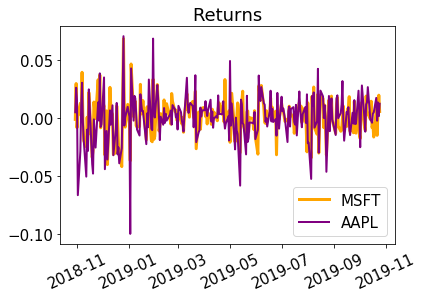

In [8]:
# plt.figure()
plt.plot(returns.index,returns["MSFT"].values,label=MS,color="orange",linewidth=3)
plt.plot(returns.index,returns["AAPL"].values,label=AP,color="purple",linewidth=2)
plt.legend()
plt.title("Returns")
plt.xticks(rotation=25)
# saver("returns")
plt.show()
# plt.close()

## Regress AAPL on MSFT

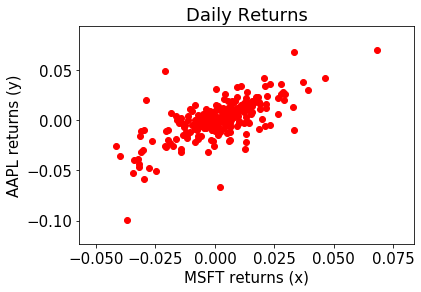

In [9]:
plt.figure()
plt.scatter(returns[MS],returns[AP],color="red")
plt.xlabel(MS+" returns (x)")
plt.ylabel(AP+" returns (y)")
plt.title("Daily Returns")
# saver("returns_scatter")
plt.show()
plt.close()

In [10]:
data=100*returns.rename(columns={MS:"x",AP:"y"})

In [11]:
class Regression:
    def __init__(self,data):
        self.xvals=data["x"]
        self.yvals=data["y"]
        self.reset()
        
    def reset(self):
        self.ctr=0
        self.callbacktext=[]
        
    def make_linear_function(self,m,b):
        def linear_function(x):
            return m*x+b
        return linear_function
    
    def Err(self,x):
        (m,b)=x
        linear_function=self.make_linear_function(m,b)
        err=self.yvals-linear_function(self.xvals)
        return 0.5*numpy.mean(err**2)

    
    def callback(self,x,verbose=False):
        (m,b)=x
        outstr="ctr={0:}; (m,b)=({1:.3f},{2:.2E}); error={3:.2E}".format(self.ctr,m,b,self.Err(x))
        self.callbacktext.append(outstr)
        if verbose:
            print(outstr)
        self.ctr+=1

In [12]:
myregression=Regression(data)

In [13]:
bestline=minimize(myregression.Err,[0,0],callback=myregression.callback)
(m_best,b_best)=bestline["x"]
print("m={0:}; b={1:}".format(m_best,b_best))

m=0.8764603174528595; b=-0.037044116163425504


In [14]:
myregression.callbacktext

['ctr=0; (m,b)=(1.009,4.09E-02); error=1.04E+00',
 'ctr=1; (m,b)=(0.876,-3.62E-02); error=1.02E+00',
 'ctr=2; (m,b)=(0.876,-3.70E-02); error=1.02E+00']

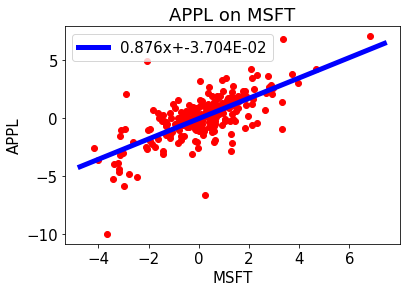

In [15]:
plt.figure()
plt.scatter(data["x"],data["y"],label=None,color="red")
plt.xlabel("MSFT")
plt.ylabel("APPL")
xlims=numpy.array(plt.gca().get_xlim())
plt.plot(xlims,m_best*xlims+b_best,color="blue",label="{0:.3}x+{1:.3E}".format(m_best,b_best))
plt.legend()
plt.title("APPL on MSFT")
plt.show()
plt.close()

## Regress MSFT on APPL

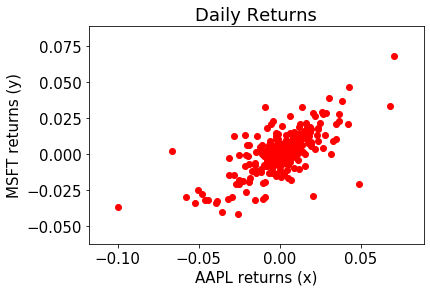

In [16]:
plt.figure()
plt.scatter(returns[AP],returns[MS],color="red")
plt.xlabel(AP+" returns (x)")
plt.ylabel(MS+" returns (y)")
plt.title("Daily Returns")
# saver("returns_scatter")
plt.show()
plt.close()

In [17]:
data1=100*returns.rename(columns={AP:"x",MS:"y"})

In [18]:
myregression1=Regression(data1)

In [19]:
bestline=minimize(myregression1.Err,[0,0],callback=myregression1.callback)
(m_best,b_best)=bestline["x"]
print("m={0:}; b={1:}".format(m_best,b_best))

m=0.5435544774543204; b=0.0936596703258214


In [20]:
myregression1.callbacktext

['ctr=0; (m,b)=(1.008,6.67E-02); error=1.05E+00',
 'ctr=1; (m,b)=(0.823,7.74E-02); error=7.82E-01',
 'ctr=2; (m,b)=(0.544,9.37E-02); error=6.30E-01']

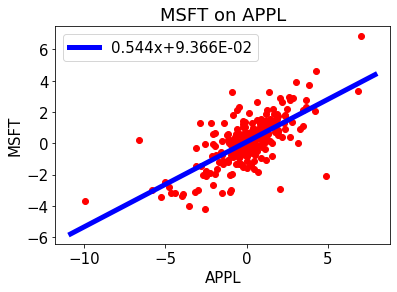

In [21]:
plt.figure()
plt.scatter(data["y"],data["x"],label=None,color="red")
plt.xlabel("APPL")
plt.ylabel("MSFT")
xlims=numpy.array(plt.gca().get_xlim())
plt.plot(xlims,m_best*xlims+b_best,color="blue",label="{0:.3}x+{1:.3E}".format(m_best,b_best))
plt.legend()
plt.title("MSFT on APPL")
plt.show()
plt.close()

# As a result, it is clear to see that the linear regression MSFT on APPL has a smaller error of 0.63 compare to APPL on MSFT which has a error of 1.02. 
# The dataset is derived over the year, and we can draw a conclusion during this time interval Apple drives the returns of Microsoft.